In [656]:
# Bibliotecas
import pandas as pd
import numpy as np

# Pacotes gráficos
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')


In [657]:
# Carregando arquivo e explorando.
url = "https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/carros-avaliacao.csv"

In [658]:
df_carros = pd.read_csv(url)
carros = pd.read_csv(url) 

In [659]:
df_carros.head()

,preco,manutencao,portas,pessoas,bagageiro,seguranca,aceitabilidade
0,muitoalto,muitoalto,2,2,pequeno,baixa,inaceitavel
1,muitoalto,muitoalto,2,2,pequeno,media,inaceitavel
2,muitoalto,muitoalto,2,2,pequeno,alta,inaceitavel
3,muitoalto,muitoalto,2,2,medio,baixa,inaceitavel
4,muitoalto,muitoalto,2,2,medio,media,inaceitavel


In [660]:
df_carros["aceitabilidade"].unique()

array(['inaceitavel', 'aceitavel', 'muitobom', 'bom'], dtype=object)

In [661]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   preco           1728 non-null   object
 1   manutencao      1728 non-null   object
 2   portas          1728 non-null   object
 3   pessoas         1728 non-null   object
 4   bagageiro       1728 non-null   object
 5   seguranca       1728 non-null   object
 6   aceitabilidade  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [662]:
df_carros.shape

(1728, 7)

In [663]:
df_carros.columns

Index(['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca',
       'aceitabilidade'],
      dtype='object')

In [664]:
df_carros.describe()

,preco,manutencao,portas,pessoas,bagageiro,seguranca,aceitabilidade
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,muitoalto,muitoalto,2,2,pequeno,baixa,inaceitavel
freq,432,432,432,576,576,576,1210


In [665]:
#Transformando os atributos em números para uso na Árvore de Decisão (Mapeamento).

carros['preco'] = carros['preco'].map({'muitoalto':3,'alto':2,'medio':1,'baixo':0})

carros['manutencao'] = carros['manutencao'].map({'muitoalto':3,'alto':2,'medio':1,'baixo':0})

carros['portas'] = carros['portas'].map({'2':2,'3':3,'4':4,'5mais':5})

carros['pessoas'] = carros['pessoas'].map({'2':2,'4':4,'5mais':5})

carros['bagageiro'] = carros['bagageiro'].map({'grande':2,'medio':1,'pequeno':0})

carros['seguranca'] = carros['seguranca'].map({'alta':2,'media':1,'baixa':0})

In [666]:
carros

,preco,manutencao,portas,pessoas,bagageiro,seguranca,aceitabilidade
0,3,3,2,2,0,0,inaceitavel
1,3,3,2,2,0,1,inaceitavel
2,3,3,2,2,0,2,inaceitavel
3,3,3,2,2,1,0,inaceitavel
4,3,3,2,2,1,1,inaceitavel
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,bom
1724,0,0,5,5,1,2,muitobom
1725,0,0,5,5,2,0,inaceitavel
1726,0,0,5,5,2,1,bom


In [667]:
#Separando atributos e classes para o treinamento e teste.

atributos_nomes = ['preco','manutencao','portas','pessoas','bagageiro','seguranca']

atributos = carros[atributos_nomes]

classes = carros['aceitabilidade']

In [668]:
#Separando o conjunto de dados para treinamento e teste.

atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size=0.1, random_state=10)

In [669]:
#Criando o modelo.

arvore = DecisionTreeClassifier() # max_depth=3 define o nível de profundidade da árvore de decisão

arvore = arvore.fit(atributos_treino,classes_treino)
#arvore = arvore.fit(atributos,classes)

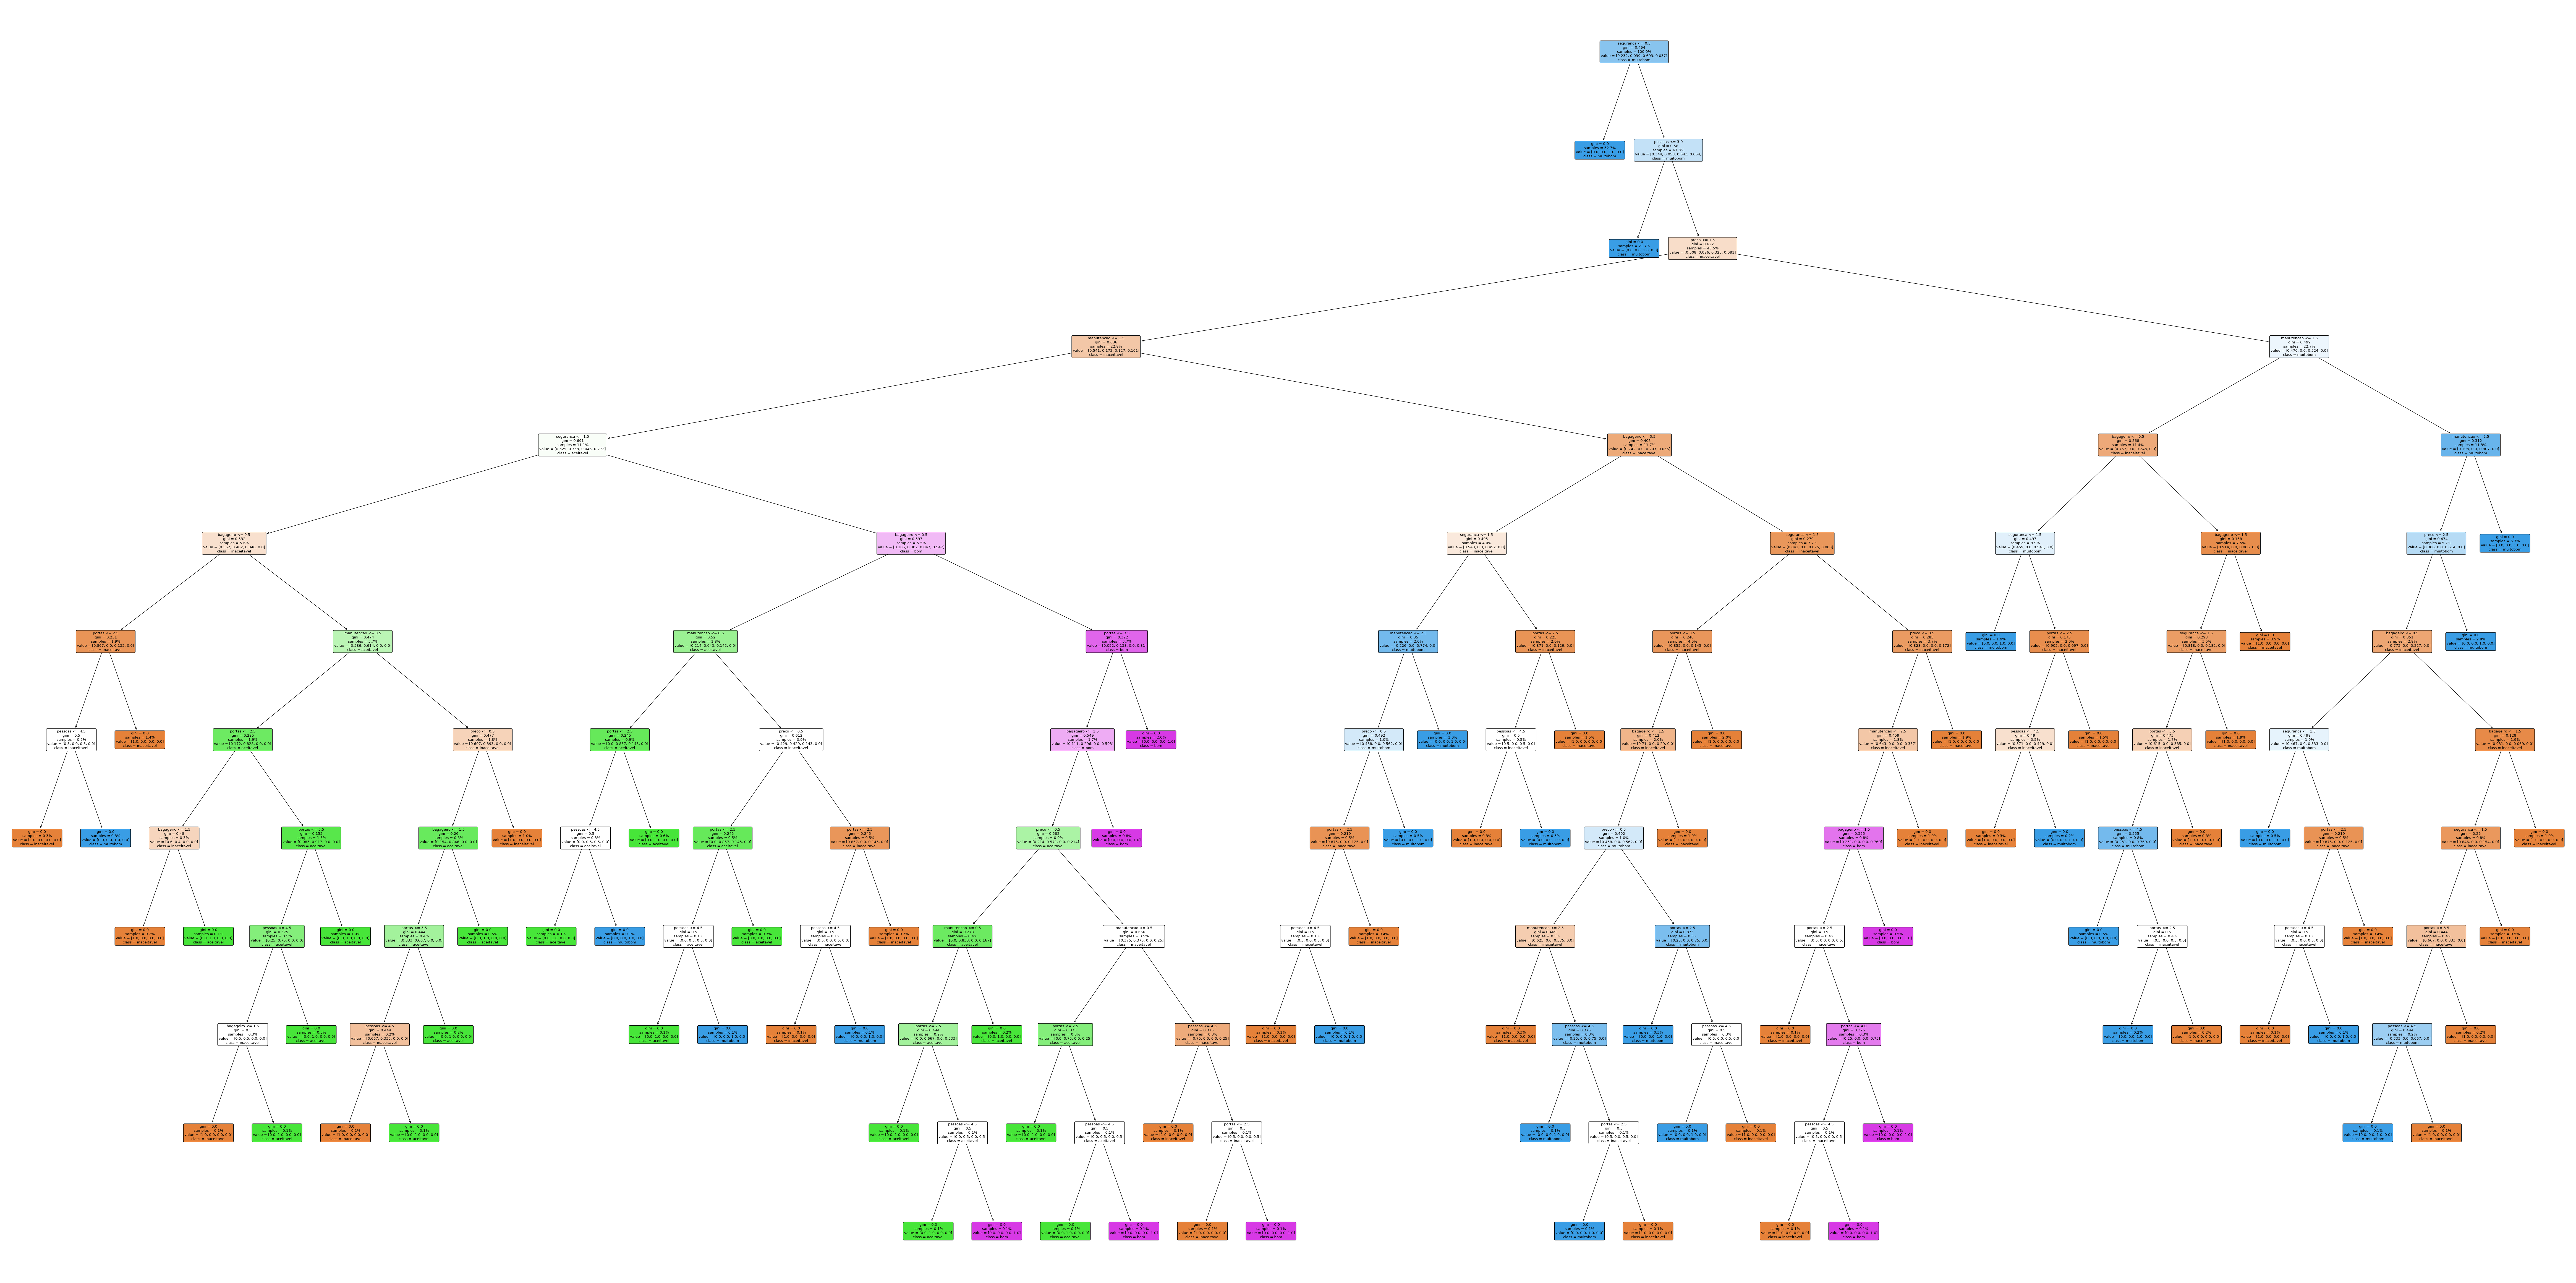

In [670]:
#Plotando a árvore de decisão em tamanho grande para conseguir visualizar em detalhes.

plt.figure(figsize=(120,60))

plot_tree(arvore, filled=True, rounded=True, class_names=['inaceitavel', 'aceitavel', 'muitobom', 'bom'],
          impurity=True, feature_names=atributos_nomes,proportion=True)

plt.show()

In [671]:
#Testando o sistema já treinado.
print(arvore.predict([[1,0,4,4,2,2]]))

['muitobom']


In [672]:
#Testando o caso perfeito em que todos os valores são os melhores possíveis.
print(arvore.predict([[0,0,5,5,2,2]]))

['muitobom']


In [673]:
print(arvore.predict([[0,0,5,5,2,0]]))

['inaceitavel']


In [674]:
#Verificando a acurácia de classificação.

classes_predicao = arvore.predict(atributos_teste)

acuracia = accuracy_score(classes_teste,classes_predicao)

print('Acurácia de classificação: {}'.format(round(acuracia,4)*100)+'%')


Acurácia de classificação: 97.69%
